In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from stravalib import unithelper
import seaborn as sea

In [26]:
df = pd.read_csv("data/activities.csv")

pd.set_option("display.max_columns", None)


## Clean up data

In [27]:
# sorts values by date (descending order) then drops duplicates
df.sort_values(by="start_date_local", ascending=False, inplace=True)
df.drop_duplicates(subset=["start_date_local"], inplace=True)
df["start_date_local"] = pd.to_datetime(df["start_date_local"])


In [28]:
# Resets index then drops classic Unnamed: 0 row
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

Fill Empty Values

In [29]:
df["achievement_count"].fillna(0, inplace=True)

In [30]:
df["pr_count"].fillna(0, inplace=True)

Start to Convert Units

In [31]:
df["distance"] = df["distance"].apply(lambda x: round(x * 0.00062137, 2))

In [32]:
df["average_temp"] = df["average_temp"].apply(lambda x: round((9/5 * x) + 32, 0))

In [33]:
df["max_speed"] = df["max_speed"].apply(lambda x: x * 2.237)

In [34]:
df["average_speed"] = df["average_speed"].apply(lambda x: x * 2.237)

In [35]:
df["elapsed_time"] = df["elapsed_time"].apply(lambda x: (x / 60))

In [36]:
# df["type"] = pd.Categorical

split dfs into run and non running dfs

In [37]:
df_nonrun = df.loc[df["type"] != "Run"]

In [38]:
df_run = df.loc[df["type"] == "Run"]

In [39]:
df.head()

,achievement_count,average_cadence,average_heartrate,average_speed,average_temp,average_watts,best_efforts,calories,device_name,distance,elapsed_time,gear,kilojoules,laps,map,max_heartrate,max_speed,max_watts,moving_time,name,pr_count,sport_type,start_date_local,suffer_score,type,weighted_average_watts
0,4.0,72.3,147.5,4.588087,90.0,308.4,6.0,488.0,Garmin Forerunner 265,3.13,40.900000,Brooks Ghost 15 Brooks Ghost,756.9,5,akumFvzrcOLe@F_@H[Nw@Ts@?IUKm@M_@?w@Ie@?AD@b@E...,184.0,8.634820,591.0,2454,Morning Run,3.0,Run,2023-06-30 10:19:18,49.0,Run,338.0
1,0.0,71.5,143.4,4.297277,91.0,297.2,6.0,545.0,Garmin Forerunner 265,3.48,48.850000,Brooks Ghost 15 Brooks Ghost,866.9,5,_kumFjzrcOVeATmANk@@Ko@UuAEu@IE@CDB\ErAWjB[pB?...,172.0,6.545462,508.0,2917,Lunch Run,0.0,Run,2023-06-29 11:57:20,45.0,Run,311.0
2,0.0,74.0,146.1,4.306225,91.0,298.4,7.0,968.0,Garmin Forerunner 265,6.24,88.650000,Brooks Ghost 15 Brooks Ghost,1557.4,7,mdumFvwrcOWLDGEIC??EGH?EABCA?KE?AGs@eB@Y`@cCNs...,166.0,6.688630,461.0,5219,Lunch Run,0.0,Run,2023-06-28 11:20:29,94.0,Run,306.0
3,0.0,72.9,143.1,4.688752,84.0,310.9,6.0,598.0,Garmin Forerunner 265,3.89,50.016667,Brooks Ghost 15 Brooks Ghost,929.8,16,weumFb~rcOOAOMy@Ku@YU@OMCI@GRa@n@wCRm@k@[g@ES]...,177.0,9.529620,666.0,2991,Morning Run,0.0,Run,2023-06-27 10:33:41,43.0,Run,336.0
4,0.0,73.7,146.1,4.525451,88.0,312.1,6.0,666.0,Garmin Forerunner 265,4.29,56.900000,Brooks Ghost 15 Brooks Ghost,1065.6,5,ojumFdyrcOjAaF\eBHgBAM@W@}BJoDE[DQHIJALHDLALKX...,165.0,6.290444,504.0,3414,Lunch Run,0.0,Run,2023-06-26 11:21:19,63.0,Run,320.0


## Graphs

In [40]:
df.loc[df["name"].str.contains("Run")]["name"].value_counts()

Lunch Run        90
Morning Run      30
Afternoon Run    18
Night Run         5
Evening Run       1
Name: name, dtype: int64

<Axes: ylabel='type'>

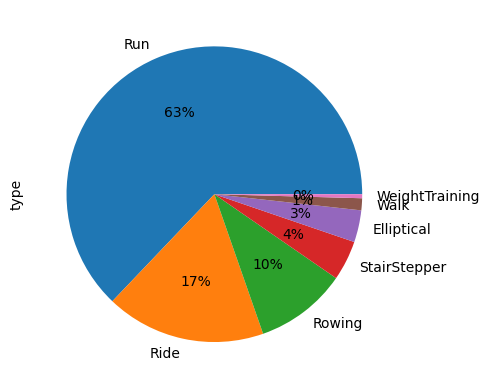

In [49]:
fig, ax = plt.subplots(1)
df["type"].value_counts().plot(kind="pie", autopct="%.0f%%", ax=ax)
# ax.legend(loc="upper left")
# 

Text(0, 0.5, 'Shoe Name')

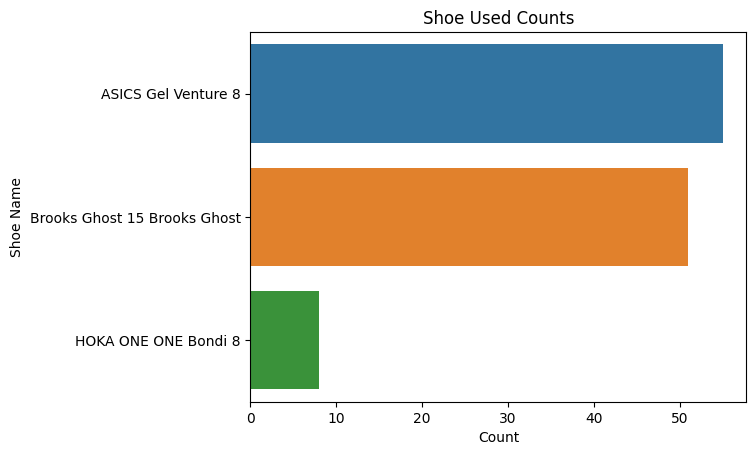

In [42]:
fig, ax = plt.subplots(1)
shoe_counts = df["gear"].value_counts().reset_index()
sea.barplot(data=shoe_counts, x="gear", y="index")
ax.set_title("Shoe Used Counts")
ax.set_xlabel("Count")
ax.set_ylabel("Shoe Name")

Text(0.5, 0, 'Distance (mi)')

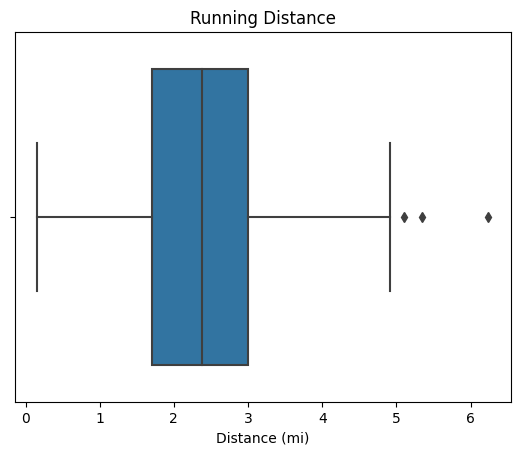

In [43]:
%matplotlib inline
fig, ax = plt.subplots(1)
sea.boxplot(data=df_run, x="distance")
ax.set_title("Running Distance")
ax.set_xlabel("Distance (mi)")


Text(0.5, 0, 'Speed (mph)')

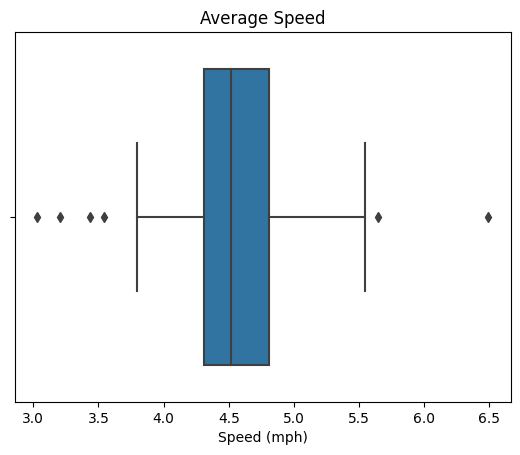

In [44]:
fig, ax = plt.subplots(1)
sea.boxplot(data=df_run, x="average_speed")
ax.set_title("Average Speed")
ax.set_xlabel("Speed (mph)")

Text(0, 0.5, 'Frequency')

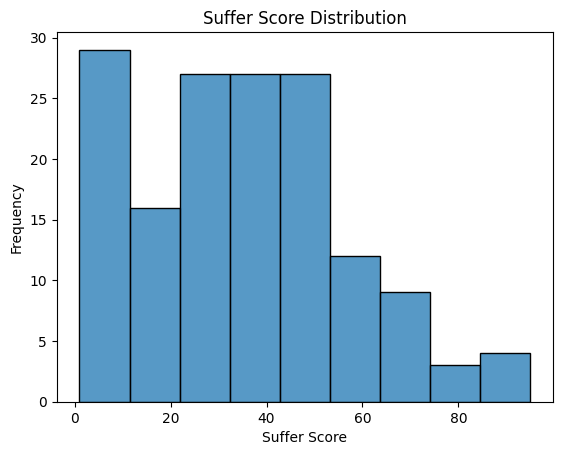

In [45]:
fig, ax = plt.subplots(1)
sea.histplot(data=df, x='suffer_score')
ax.set_title("Suffer Score Distribution")
ax.set_xlabel("Suffer Score")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Suffer Score')

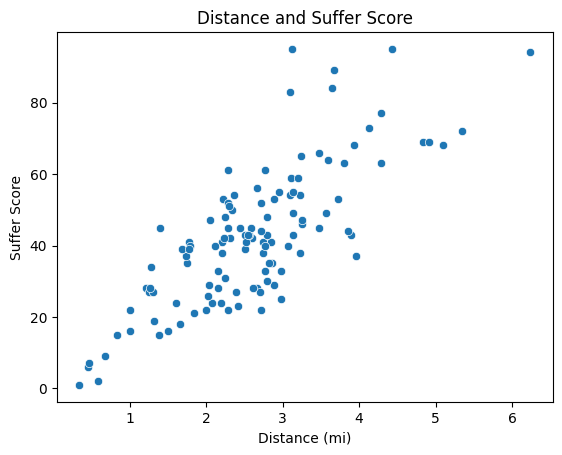

In [46]:
fig, ax = plt.subplots(1)
sea.scatterplot(data=df_run, x="distance", y="suffer_score", )
ax.set_title("Distance and Suffer Score")
ax.set_xlabel("Distance (mi)")
ax.set_ylabel("Suffer Score")

Text(0, 0.5, 'Frequency')

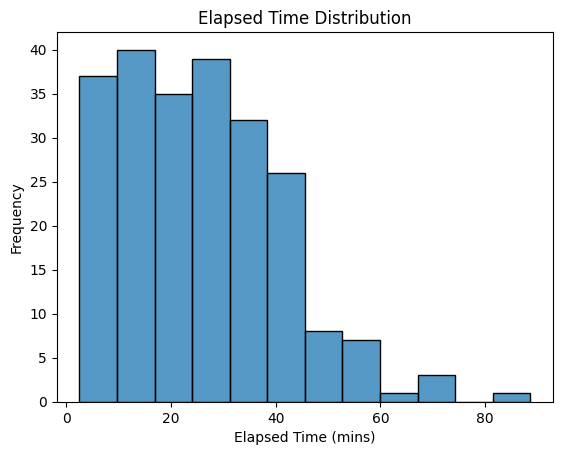

In [50]:
fig, ax = plt.subplots(1)
sea.histplot(data=df, x='elapsed_time')
ax.set_title("Elapsed Time Distribution")
ax.set_xlabel("Elapsed Time (mins)")
ax.set_ylabel("Frequency")

In [48]:
df.to_csv("data/activities_updated.csv")